In [1]:

import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('pseudonymized-data.csv')

In [3]:
df.head()

,Unnamed: 0,Community,V27,V28,V29,V30,V31,V32,V33
0,0,Comm.FOSSASIA,4,4,4,5,1,1,1
1,1,Comm.FOSSASIA,5,5,5,5,1,1,1
2,2,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
3,3,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
4,4,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1


In [4]:
df = df.rename(columns={df.columns[0]: 'id'})
df.head()

,id,Community,V27,V28,V29,V30,V31,V32,V33
0,0,Comm.FOSSASIA,4,4,4,5,1,1,1
1,1,Comm.FOSSASIA,5,5,5,5,1,1,1
2,2,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
3,3,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
4,4,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1


Clean data
- community -1
- all qns -1
- some qns -1


In [13]:
df = df[df["Community"] != "-1"]

In [14]:
df.iloc[:,1:].describe()

,V27,V28,V29,V30,V31,V32,V33
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,1.492754,1.533333,1.440580,1.623188,0.504348,0.344928,0.678261
std,2.648075,2.682776,2.605357,2.763453,1.689781,1.542003,1.864047
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
communities = df.Community.unique()

print(len(communities))
print(communities)

13
['Comm.FOSSASIA' 'Comm.ROS' 'Comm.Coala' 'Comm.Mozilla'
 'Comm.Linux_Kernel' 'Comm.OpenGenus' 'Comm.ReactJS' 'Comm.Plone'
 'Comm.Odoo' 'Comm.NodeJS' 'Comm.Apache' 'Comm.jQuery' 'Comm.OpenSUSE']


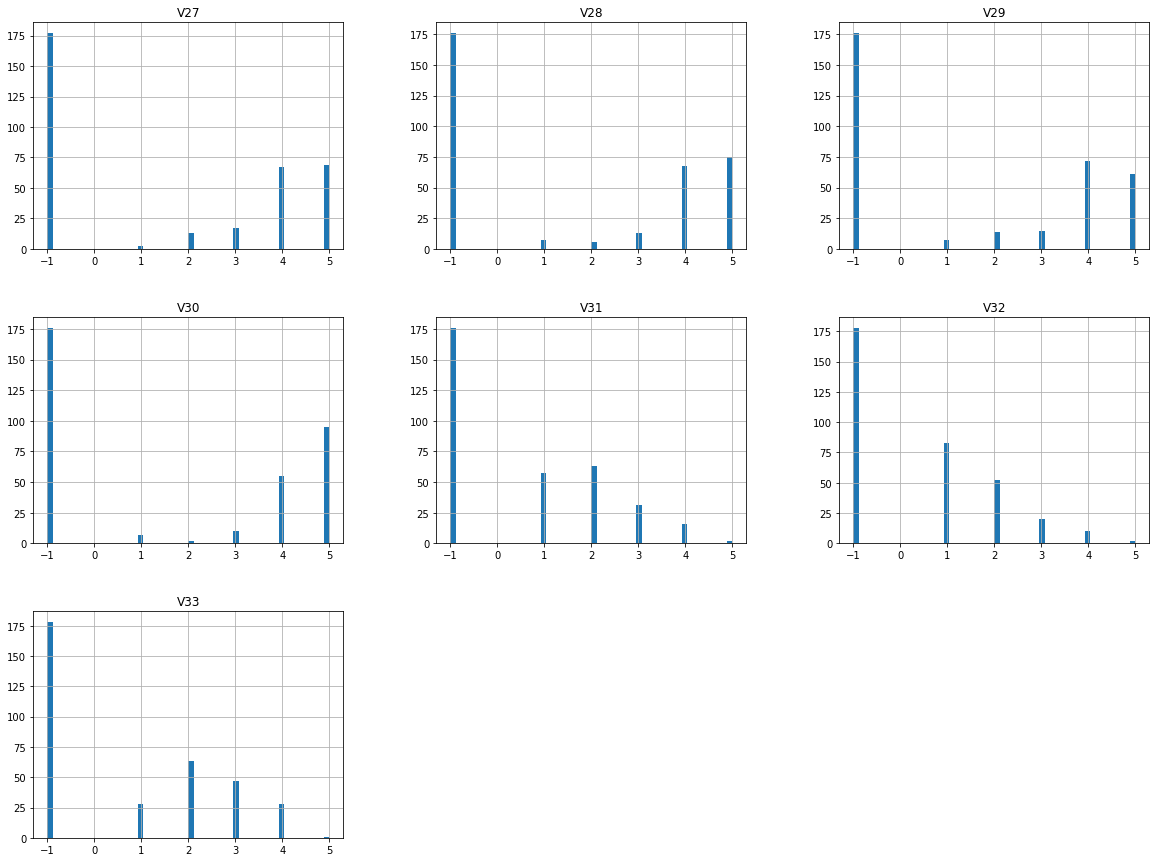

In [16]:
df.hist(column=df.columns[1:], bins=50, figsize=(20,15))
plt.show()

In [24]:
# V27 = df[df.Community == 'Comm.FOSSASIA'].V27.to_numpy()

V27 = [df[df.Community == community].V27.to_numpy() for community in communities]
V28 = [df[df.Community == community].V28.to_numpy() for community in communities]
V29 = [df[df.Community == community].V29.to_numpy() for community in communities]
V30 = [df[df.Community == community].V30.to_numpy() for community in communities]
V31 = [df[df.Community == community].V31.to_numpy() for community in communities]
V32 = [df[df.Community == community].V32.to_numpy() for community in communities]
V33 = [df[df.Community == community].V33.to_numpy() for community in communities]

In [40]:
# %%
N = [len(V27), len(V28), len(V29), len(V30), len(V31), len(V32), len(V33)]
μ = [[np.mean(v) for v in V27], [np.mean(v) for v in V28], [np.mean(v) for v in V29],
     [np.mean(v) for v in V30], [np.mean(v) for v in V31], [np.mean(v) for v in V32], [np.mean(v) for v in V33]]
σ = [[np.std(v) for v in V27], [np.std(v) for v in V28], [np.std(v) for v in V29],
     [np.std(v) for v in V30], [np.std(v) for v in V31], [np.std(v) for v in V32], [np.std(v) for v in V33]]

In [41]:
# N,μ,σ

([13, 13, 13, 13, 13, 13, 13],
 [[1.1029411764705883,
   3.5,
   0.5,
   1.8,
   0.6607142857142857,
   -0.125,
   2.8461538461538463,
   2.375,
   0.6451612903225806,
   2.888888888888889,
   1.5227272727272727,
   1.2,
   3.3],
  [1.2794117647058822,
   3.3,
   0.5416666666666666,
   2.0,
   0.2857142857142857,
   -0.0625,
   3.076923076923077,
   2.375,
   0.7741935483870968,
   2.7777777777777777,
   1.7272727272727273,
   1.8,
   3.7],
  [1.2352941176470589,
   3.2333333333333334,
   0.5,
   1.8,
   0.23214285714285715,
   -0.25,
   3.0,
   2.1666666666666665,
   0.7419354838709677,
   2.6666666666666665,
   1.5,
   1.8,
   3.65],
  [1.2794117647058822,
   3.533333333333333,
   0.5416666666666666,
   2.2,
   0.44642857142857145,
   -0.0625,
   3.3846153846153846,
   2.4583333333333335,
   0.8387096774193549,
   2.888888888888889,
   1.7954545454545454,
   1.8,
   3.8],
  [0.1323529411764706,
   1.5333333333333334,
   -0.08333333333333333,
   1.6,
   0.3392857142857143,
   -0.5625,